In [1]:
## Bring in needed mods
import pandas as pd, numpy as np, glob, sys, os, seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.insert(0, '/home/croth/QTL-functions/SCRIPTS/')
import qtlfunctions as qtlfun

In [2]:
## Define ftn for use in brining in data
def makedf(paths,sep='_',fn = 1):
    df = []
    for d in paths:
        
        temp = pd.read_csv(d,index_col=0)
        temp['Chrom'] = int(d.split(sep)[fn])
        temp['Oldix'] = temp.index
        df.append(temp)
        
    return pd.concat(df).reset_index(drop=True)

In [3]:
## Load in centormere locs
centpaths = '/home/croth/Downloads/B3502/DATA/FungiDB-48_CneoformansJEC21_centromeres.csv'
centlocs = pd.read_csv(centpaths,index_col=0)

## Load in gff path
gffpath = '/home/croth/Downloads/B3502/REF/FungiDB-48_CneoformansJEC21.gff.gz'
gff = qtlfun.loadgff(gffpath)

In [4]:
## Bring in phenotype information
data = '../PHENOTYPE/202011_WGS_B3502Progeny_for_QTL.xlsx'
pheno = pd.read_excel(data)

## Set progeny
pheno['Progeny'] = [''.join(a.split("_"))[:3] for a in pheno[pheno.columns[0]]]
pheno['Parent'] = [ a.split('_')[0].split('B3502')[-1] for a in pheno['Cross_Progeny']]

## Add a phenotype column with a dictionarry
## Make a numeric map of phenotypes
unipheno = sorted(pheno[pheno.columns[3]].unique())

## Make dicitonary
npheno = np.array([3,0,0,2,1],dtype=float)
pdict = dict(zip(unipheno,npheno))

## Add phenotype
pheno['Phenotype'] = pheno[pheno.columns[3]].replace(pdict)

## Drop un-needed columns
pheno.drop(pheno.columns[:2].tolist()+['Notes'],axis=1,inplace=True)

## View head
pheno.head()

,Basidium,Phenotype on MS (N-no filamentation; Y-filamentation; L-giant cells; T-transgressive filamentation),Progeny,Parent,Phenotype
0,1.0,N,A01,A1,0.0
1,1.0,Y,A02,A1,1.0
2,1.0,N,A03,A1,0.0
3,1.0,L,A04,A1,3.0
4,2.0,N (with rare spots of T),A05,A1,0.0


In [5]:
pheno

,Basidium,Phenotype on MS (N-no filamentation; Y-filamentation; L-giant cells; T-transgressive filamentation),Progeny,Parent,Phenotype
0,1.0,N,A01,A1,0.0
1,1.0,Y,A02,A1,1.0
2,1.0,N,A03,A1,0.0
3,1.0,L,A04,A1,3.0
4,2.0,N (with rare spots of T),A05,A1,0.0
5,2.0,L,A06,A1,3.0
6,2.0,Y,A07,A1,1.0
7,2.0,N,A08,A1,0.0
8,3.0,T,A09,A1,2.0
9,3.0,N,A10,A1,0.0


In [5]:
## Bring in genotypes of rows x columns of vcf files
datapath = '../GENOTYPE/GT/*genotype*.csv.gz'
genopaths = sorted(glob.glob(datapath))
assert len(genopaths) == 14
geno = makedf(genopaths)
geno.shape

(113730, 84)

In [7]:
geno.columns

Index(['B10', 'B05', 'B03', 'B02', 'A42', 'B20', 'A41', 'A40', 'B07', 'A39',
       'B11', 'A38', 'A36', 'A35', 'B_33', 'B_21', 'B_32', 'B04', 'A18',
       'B_31', 'B_29', 'A26', 'NIH433', 'A01', 'A12', 'B12', 'B09', 'B_24',
       'B_23', 'A09', 'B_25', 'I641', 'A10', 'B_13', 'A37', 'B_19', 'B06',
       'B_30', 'I643', 'B_14', 'B08', 'B_22', 'B_26', 'A43', 'A24', 'B_28',
       'B_16', 'A22', 'I645', 'A03', 'B_15', 'NIH12', 'A27', 'A04', 'B_27',
       'B_17', 'A29', 'A05', 'A25', 'A06', 'B01', 'A07', 'A02', 'A08', 'A21',
       'A11', 'A13', 'B_18', 'A28', 'A44', 'A19', 'A14', 'A15', 'A16', 'A17',
       'A20', 'A23', 'A30', 'A31', 'A33', 'A32', 'A34', 'Chrom', 'Oldix'],
      dtype='object')

In [10]:
samples = sorted([s for s in geno.columns[:-2]])

In [16]:
len(samples)

82

In [11]:
samples

['A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A38',
 'A39',
 'A40',
 'A41',
 'A42',
 'A43',
 'A44',
 'B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B12',
 'B20',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_29',
 'B_30',
 'B_31',
 'B_32',
 'B_33',
 'I641',
 'I643',
 'I645',
 'NIH12',
 'NIH433']

In [14]:
## Make a list of the stocks
stocks = ['B3502_%s'%s for s in pheno.Parent.unique()]
stocks

['B3502_A1', 'B3502_B1', 'B3502_B7']

In [15]:
## Find index where B1 genotype != the others
b1nota1_ix = (geno[stocks[1]] != geno[stocks[0]])
b1notb7_ix = (geno[stocks[1]] != geno[stocks[-1]])

## Drop na
stock_dif_ix = geno[b1nota1_ix & 
                    b1notb7_ix][stocks].dropna().index
len(stock_dif_ix)

KeyError: 'B3502_B1'

In [8]:
## Bring in read depth rows x columns of vcf files
data = '../GENOTYPE/DP/*depths.csv.gz'
depthpaths = sorted(glob.glob(data))
assert len(depthpaths) == 14
depth = makedf(depthpaths)
depth.shape

(446653, 69)

In [9]:
## Calculate mean, min and max depths of stock dif vars
mean_stock_depth = depth.loc[stock_dif_ix,stocks].T.mean()
min_stock_depth = depth.loc[stock_dif_ix,stocks].T.min()
max_stock_depth = depth.loc[stock_dif_ix,stocks].T.max()

In [10]:
## Bring in allelic read depth ratios of
## rows x columns of vcf files
data = '../GENOTYPE/AF/*ratios.csv.gz'
alleledepth = sorted(glob.glob(data))
assert len(alleledepth) == 14
ratio = makedf(alleledepth)
ratio.shape

(446653, 69)

In [11]:
## Calculate mean, min and max of ratios of stock dif vars
mean_stock_ratio = ratio.loc[stock_dif_ix,stocks].T.mean()
min_stock_ratio = ratio.loc[stock_dif_ix,stocks].T.min()
max_stock_ratio = ratio.loc[stock_dif_ix,stocks].T.max()

In [12]:
## Bring in information rows x columns of vcf files
data = '../GENOTYPE/INFO/*.csv.gz'
infopaths = sorted(glob.glob(data))
assert len(infopaths) == 14
info = makedf(infopaths)
info.shape

(446653, 12)

In [13]:
## Make a dataframe of potential stock variants
## Take info
tempdf = info.loc[stock_dif_ix].copy()

## stock genotypes 
dif_genos = geno.loc[stock_dif_ix,stocks].copy()

## concatonate
df = pd.concat([tempdf,dif_genos],axis=1)

## Add depth and ratio info
labels = ['min','max','mean']

for i,j in enumerate([min_stock_depth,
                      max_stock_depth,
                      mean_stock_depth]):
    
    df['%s_depth'%labels[i]] = np.round(j,2)
    
for i,j in enumerate([min_stock_ratio,
                      max_stock_ratio,
                      mean_stock_ratio]):
    
    df['%s_ratio'%labels[i]] = np.round(j,2)
    
## Drop un-needed columns    
to_drop = ['Maxlen','Minlen','Depth','Nallele',
           'Callrate','Qual','Type','Oldix',
           'max_ratio','max_depth']

df.drop(to_drop,axis=1,inplace=True)

## View head
df.head()

,Seqid,Pos,Alleles,Chrom,B3502_A1,B3502_B1,B3502_B7,min_depth,mean_depth,min_ratio,mean_ratio
8887,AE017341.1,461149,G.C,1,0.0,1.0,0.0,70.0,74.67,0.57,0.63
19631,AE017341.1,977318,T.C,1,1.0,0.0,1.0,324.0,408.00,0.47,0.54
27604,AE017341.1,1430787,G.T,1,0.0,1.0,0.0,20.0,32.33,0.95,0.97
36246,AE017341.1,1954856,CTAGAGGCAGGGGGGGGGGGACGGAGT.CAACCGGCAGGGGGGGGG...,1,1.0,2.0,1.0,14.0,15.67,0.00,0.00
38830,AE017341.1,2149478,AATTT.CATTC,1,0.0,1.0,0.0,109.0,129.33,0.48,0.53


In [40]:
## Check our work
assert np.sum(stock_dif_ix-df.index.values) == 0

In [100]:
## Examine as a ftn of paramaters
## The number of vairants in B3501_B1 we detect
drf = 0.1 ## Slide of allelic read reatio
ratio_fs = np.arange(0,1+drf,drf)
covx_fs = np.arange(0,12+1,1)

## Gather results per conditions
rf_pass = []
for ratio_f in ratio_fs:
    
    covx_pass = []
    for covx_f in covx_fs:
        
        ## Make sure the B3502_B1 stock passes 
        b1_depth_pass = depth[(depth[stocks[1]] >= covx_f) & 
                      (depth.index.isin(stock_dif_ix))].index

        b1_ratio_pass = ratio[(ratio[stocks[1]] >=ratio_f) & 
                      (ratio.index.isin(stock_dif_ix))].index
        
        rp = df[(df.mean_depth>=covx_f) & 
           (df.mean_ratio>=ratio_f) & 
           (df.index.isin(b1_depth_pass)) & 
           (df.index.isin(b1_ratio_pass))].shape[0]
        
        covx_pass.append(rp)
    rf_pass.append(covx_pass)
    
## Make into a dataframe
test = pd.DataFrame(rf_pass)
test.index = np.round(ratio_fs,2)

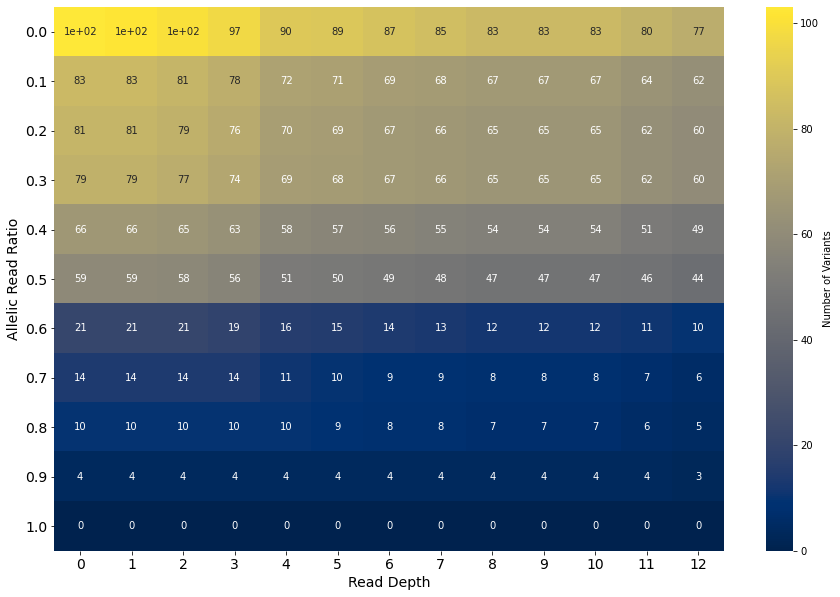

In [110]:
## Plot results
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(test,cmap='cividis',annot=True, 
            cbar_kws={'label': 'Number of Variants'});
plt.yticks(fontsize=14,rotation=0);
plt.xticks(fontsize=14);
plt.ylabel('Allelic Read Ratio',fontsize=14)
plt.xlabel('Read Depth',fontsize=14);

In [119]:
## Filter potential snps
ratio_f = 0.5
covx_f = 10

## Make sure the B3502_B1 stock passes 
b1_depth_pass = depth[(depth[stocks[1]] >= covx_f) & 
                      (depth.index.isin(stock_dif_ix))].index

b1_ratio_pass = ratio[(ratio[stocks[1]] >=ratio_f) & 
                      (ratio.index.isin(stock_dif_ix))].index

## take variants
vardf = df[(df.mean_depth>=covx_f) & 
           (df.mean_ratio>=ratio_f) & 
           (df.index.isin(b1_depth_pass)) & 
           (df.index.isin(b1_ratio_pass))].copy()

In [120]:
## Find genes that overlap with our candidate variants
gene_res = []

for s in vardf.Seqid.unique():
    vt = vardf[(vardf.Seqid==s)]
    gfft = gff[(gff.Type=='gene') & (gff.Seqid==s)]
    
    for i,p in vt.iterrows():
        pt = p.Pos
        
        for j,k in gfft.iterrows():    
            gps = np.arange(k.Start,k.End+1)
            
            if pt in gps:
                gene_res.append((i,k.Gene))
            else:
                pass
            
hitdf = pd.DataFrame(gene_res,columns=['gix','Gene'])
hitdf.index = hitdf.gix
vardf['Gene'] = hitdf['Gene']
vardf.shape

(47, 12)

In [126]:
## Save out data
vardf[['Seqid','Chrom','Pos','Gene','Alleles']+stocks
     ].to_csv('../GENOTYPE/B3502_parent_variants.csv.gz')

In [108]:
## View dataframe results 
vardf[['Chrom','Pos','Gene','Alleles']]

,Chrom,Pos,Gene,Alleles
8887,1,461149,NaN,G.C
27604,1,1430787,NaN,G.T
38830,1,2149478,NaN,AATTT.CATTC
53417,2,428582,NaN,A.T
53419,2,428598,NaN,T.C
53420,2,428603,NaN,G.A
53452,2,429078,NaN,GCATTT.ACGTTA
62654,2,789595,NaN,G.T
62656,2,789611,NaN,G.A
63450,2,865345,NaN,T.C


In [111]:
## Gather B3502_progeny who are self filamentous
b1_filamentation = pheno[(pheno.Parent=='B1') & 
                         (pheno.Phenotype==1)
                        ].Progeny.tolist()

## How many are there of these?
len(b1_filamentation)

4

In [114]:
## Sum the progeny genotypes
## We are looking for sites not equal to B3502 (ie 1)
## So sites with a sum of zero here in the four
## self-filamentous progeny are candidate repressor sites
vardf['B1_SF_progeny_sum'] = geno.loc[vardf.index,b1_filamentation].T.sum()
vardf[(vardf.B1_SF_progeny_sum==0)][['Chrom','Pos','Gene','Alleles']]

,Chrom,Pos,Gene,Alleles
8887,1,461149,NaN,G.C
38830,1,2149478,NaN,AATTT.CATTC
53417,2,428582,NaN,A.T
53419,2,428598,NaN,T.C
53420,2,428603,NaN,G.A
53452,2,429078,NaN,GCATTT.ACGTTA
62654,2,789595,NaN,G.T
116230,3,1352772,NaN,A.G
195340,5,825063,NaN,C.T
195564,5,829007,NaN,G.A.T


In [115]:
## Gather B3502_progeny who are non-yeast growth
b1_non_yeast= pheno[(pheno.Parent=='B1') & 
                         (pheno.Phenotype!=0)
                        ].Progeny.tolist()

## How many are there of these?
len(b1_non_yeast)

8

In [116]:
## Sum the progeny genotypes
## We are looking for sites not equal to B3502_B1 (ie 1)
## So sites with a sum of zero here in the four
## non-yeast progeny are candidate repressor sites
vardf['B1_NY_progeny_sum'] = geno.loc[vardf.index,b1_non_yeast].T.sum()
vardf[(vardf.B1_NY_progeny_sum==0)][['Chrom','Pos','Gene','Alleles']]

,Chrom,Pos,Gene,Alleles
38830,1,2149478,NaN,AATTT.CATTC
53417,2,428582,NaN,A.T
53452,2,429078,NaN,GCATTT.ACGTTA
62654,2,789595,NaN,G.T
116230,3,1352772,NaN,A.G
195340,5,825063,NaN,C.T
195564,5,829007,NaN,G.A.T
207085,5,1505348,CNE05380,G.A
266325,7,902053,NaN,ATTCA.GTTTG
305166,9,3253,NaN,T.C


In [117]:
## Gather all progeny that show filamentous growth
## regardlest of parent
filam_prog = pheno[(pheno.Phenotype==1)
                    ].Progeny.tolist()

## How many are there of these?
len(filam_prog)

13

In [118]:
## Sum the progeny genotypes
## We are looking for sites not equal to B3502_B1 (ie 1)
## So sites with a sum of zero here in all of the
## filamentous progeny are candidate repressor sites
vardf['Progeny_sum'] = geno.loc[vardf.index,filam_prog].T.sum()
vardf[(vardf.Progeny_sum==0)][['Chrom','Pos','Gene','Alleles']]

,Chrom,Pos,Gene,Alleles
8887,1,461149,NaN,G.C
38830,1,2149478,NaN,AATTT.CATTC
53452,2,429078,NaN,GCATTT.ACGTTA
62654,2,789595,NaN,G.T
116230,3,1352772,NaN,A.G
195340,5,825063,NaN,C.T
195564,5,829007,NaN,G.A.T
207085,5,1505348,CNE05380,G.A
244964,6,1437085,CNF04940,ATTTTTTCG.ATTTTTCG
244972,6,1437350,CNF04940,C.T


In [23]:
## Analysis of clones
## Here we are searching for valid variants that seperate the clones

In [24]:
## Take a look at the first set of clones
c1 = 'A27'
c2 = 'A24'

clones1 = [c1,c2]

## Find candidate genomic sites that are 
## different between the clones
clone1_dif_ix = geno[(geno[c1] != geno[c2])][clones1].dropna().index

## Filter on covX
clone_covx_f = 8
clone1_depth_ix = depth[(depth[clones1].T.min() > clone_covx_f) & 
                        (depth.index.isin(clone1_dif_ix))].index

## Filter ratios
clone_ratio_f = .6
clone1_ratio_ix = ratio[(ratio[clones1].T.min() >= clone_ratio_f) & 
                        (ratio.index.isin(clone1_depth_ix))][clones1].index

pheno[(pheno.Progeny.isin(clones1))]

,Basidium,Phenotype on MS (N-no filamentation; Y-filamentation; L-giant cells; T-transgressive filamentation),Progeny,Parent,Phenotype
23,4.0,Y,A24,B1,1.0
26,4.0,T,A27,B1,2.0


In [25]:
## What are the genotypes at these sites in 
## these clones and their parent strain?
geno.loc[clone1_ratio_ix,clones1+['B3502_B1']]

,A27,A24,B3502_B1
194182,1.0,0.0,0.0
362451,0.0,2.0,0.0


In [26]:
## Check out the info on these
info.loc[clone1_ratio_ix]

,Seqid,Pos,Qual,Callrate,Nallele,Alleles,Maxlen,Minlen,Depth,Type,Chrom,Oldix
194182,AE017345.1,800527,0.017306,1.0,1,A.G,1,1,839,snp,5,18478
362451,AE017350.1,1082725,0.001558,1.0,2,GATT.AATC.AATT,4,4,634,complex,10,24795


In [27]:
## Take a look at the first set of clones
c3 = 'A44'
c4 = 'A43'

clones2 = [c3,c4]

## Find candidate genomic sites that are 
## different between the clones
clone2_dif_ix = geno[(geno[c3] != geno[c4])][clones2].dropna().index

## Filter on covX
clone_covx_f = 8
clone2_depth_ix = depth[(depth[clones2].T.min() > clone_covx_f) & 
                        (depth.index.isin(clone2_dif_ix))].index

## Filter ratios
clone_ratio_f = .6
clone2_ratio_ix = ratio[(ratio[clones2].T.min() >= clone_ratio_f) & 
                        (ratio.index.isin(clone2_depth_ix))].index

pheno[(pheno.Progeny.isin(clones2))]

,Basidium,Phenotype on MS (N-no filamentation; Y-filamentation; L-giant cells; T-transgressive filamentation),Progeny,Parent,Phenotype
42,4.0,T,A43,B7,2.0
43,4.0,Y,A44,B7,1.0


In [28]:
## What are the genotypes at these sites in 
## these clones and their parent strain?
geno.loc[clone2_ratio_ix,clones2+['B3502_B7']]

,A44,A43,B3502_B7


In [29]:
geno.loc[clone1_ratio_ix,clones2]

,A44,A43
194182,0.0,0.0
362451,0.0,0.0


In [30]:
clones = clones1+clones2
clones

['A27', 'A24', 'A44', 'A43']

In [31]:
## Find genotypes with similar patters of 
## inheritance across clones
clones_dif_ix = geno[(geno[c1]!=geno[c2]) & 
                     (geno[c3]!=geno[c4]) & 
                     (geno[c1]==geno[c3]) & 
                     (geno[c2]==geno[c4])
                    ][clones].dropna().index

In [32]:
ratio.loc[clones_dif_ix,clones+['B3502_B1','B3502_B7']]

,A27,A24,A44,A43,B3502_B1,B3502_B7
35712,0.500000,0.400000,0.500000,0.333333,0.000000,0.200000
37043,0.076923,0.961538,0.055556,0.961538,0.941860,0.983871
79155,0.111111,0.898305,0.037037,0.891892,0.983607,0.959184
97003,0.976190,0.033333,0.967742,0.000000,0.020833,0.000000
253618,0.944444,0.000000,0.928571,0.000000,0.964286,0.958333
256229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
275883,0.136364,0.952381,0.000000,0.923077,0.942308,0.878788
325679,0.228571,0.903846,0.054054,0.896552,0.981013,0.051282
333924,0.000000,0.933333,0.130435,0.956522,0.950000,0.916667
337053,0.250000,0.142857,0.000000,0.222222,0.875000,0.083333


In [33]:
depth.loc[clones_dif_ix,clones+['B3502_B1','B3502_B7']]

,A27,A24,A44,A43,B3502_B1,B3502_B7
35712,1.0,4.0,5.0,2.0,7.0,4.0
37043,12.0,25.0,17.0,25.0,85.0,61.0
79155,35.0,58.0,26.0,36.0,60.0,48.0
97003,41.0,29.0,30.0,21.0,47.0,45.0
253618,17.0,19.0,13.0,14.0,55.0,47.0
256229,0.0,0.0,2.0,1.0,5.0,2.0
275883,21.0,20.0,9.0,12.0,51.0,32.0
325679,34.0,51.0,36.0,28.0,157.0,116.0
333924,6.0,29.0,22.0,22.0,39.0,23.0
337053,3.0,6.0,3.0,8.0,23.0,11.0


In [34]:
geno.loc[clones_dif_ix,clones+['B3502_B1','B3502_B7','CF830']]

,A27,A24,A44,A43,B3502_B1,B3502_B7,CF830
35712,3.0,4.0,3.0,4.0,3.0,1.0,3.0
37043,1.0,0.0,1.0,0.0,0.0,0.0,0.0
79155,1.0,0.0,1.0,0.0,0.0,0.0,0.0
97003,0.0,1.0,0.0,1.0,1.0,1.0,1.0
253618,0.0,1.0,0.0,1.0,0.0,0.0,1.0
256229,1.0,2.0,1.0,2.0,1.0,1.0,1.0
275883,1.0,0.0,1.0,0.0,0.0,0.0,0.0
325679,1.0,0.0,1.0,0.0,0.0,1.0,0.0
333924,1.0,0.0,1.0,0.0,0.0,0.0,0.0
337053,3.0,2.0,3.0,2.0,0.0,2.0,1.0


In [35]:
assert 1 ==0

AssertionError: 

In [ ]:





## Load in chromosome map
mappath = '/home/croth/Downloads/B3502/DATA/chrommap.csv.gz'
chrommap = pd.read_csv(mappath)
chrommap['Seqid'] = chrommap.Contig
chrommap.drop('Contig',axis=1,inplace=True)



## Merge dataframes
chrommap['Chromosome'] = chrommap.index+1
chrommap = chrommap.merge(centlocs)


gff = gff.merge(chrommap)

#stock_variants = pd.read_csv('/home/croth/Downloads/B3502/DATA/B3502_stocks_variants.csv',
#                            index_col=0)
#stock_variants.head()

## Load in gene changes analysis 
## This was done on stocks of B3502, CF830, and JEC21
gene_changes = pd.read_csv('../GENES/gene_changes.csv.gz')



In [ ]:
pheno[(pheno.Parent=='B1')].shape

In [ ]:
pheno[(pheno.Parent=='B1')]

In [ ]:
## Gather samples view last 5
samples = sorted(geno.columns.tolist()[:-2])
len(samples), samples[-5:]

In [ ]:
## Set parents used in sequenced cross A1, B1, B7
parents = ['B3502_%s'%a for a in ['A1','B1','B7']] + ['CF830','JEC21'] 
parents

In [ ]:
## concatonate info with geno
seggeno = geno.loc[:,~geno.columns.isin(['Chrom','Oldix'])]
genodf = pd.concat([info,seggeno],axis=1)
genodf.shape

In [ ]:
## Find sites that are invariant across population.
## IE gvs that are all JEC21 (reference genotype)
parent_invar_0_ix = geno[(geno[parents].T.sum() == 0) | 
                         (geno[parents].T.var() == 0)].index.tolist()
len(parent_invar_0_ix)

In [ ]:
## Gather the variant sites
vargeno_temp = genodf[~(genodf.index.isin(parent_invar_0_ix))]
vargeno_temp.shape

In [ ]:
vartest_ix = vargeno_temp[(vargeno_temp[parents].T.var()>0)
                          ][parents].dropna().index

In [ ]:
non_sf_parent = 'B3502_B1'
other_parents = [p for p in parents ]

## Gather indcies where at least one of the 
## B3502 stock parents is different from CF830
var_ix = []
for p in parents:
    
    pgeno = vargeno_temp[[p,parents[-1]]].diff(axis=1).dropna(axis=0,how='all')
    dif_ix = pgeno[(pgeno[parents[-1]] != 0)].index
    var_ix.append(dif_ix)
    
var_ix = np.unique(np.concatenate(var_ix))

## Gather this variant genotype info check shape
vargeno = vargeno_temp.loc[var_ix].dropna().copy()
vargeno.shape

In [ ]:
vargeno = vargeno_temp.loc[vartest_ix,:].copy()
vargeno.shape

In [ ]:
missing = [i for i in vargeno_temp.index if i not in vargeno.index]
len(missing)

In [ ]:
## Make parent and stock variant dataframes
infocols = ['Seqid','Chrom','Oldix','Pos','Qual','Nallele','Alleles','Type']

parents_gvs = vargeno[parents+['JEC21']+infocols].T.drop_duplicates().T.copy()

parents_gvs['Avedepth'] = depth.loc[vargeno.index,parents+['JEC21']].T.mean()
parents_gvs['Mindepth'] = depth.loc[vargeno.index,parents+['JEC21']].T.min()
parents_gvs['Maxdepth'] = depth.loc[vargeno.index,parents+['JEC21']].T.max()

parents_gvs['Averatio'] = ratio.loc[vargeno.index,parents+['JEC21']].T.mean()
parents_gvs['Minratio'] = ratio.loc[vargeno.index,parents+['JEC21']].T.min()
parents_gvs['Maxratio'] = ratio.loc[vargeno.index,parents+['JEC21']].T.max()

parents_gvs.to_csv('../GENOTYPE/B3502_parent_variants.csv.gz',index=True)

In [ ]:
casual = 1438418

In [ ]:
candidate_ix = parents_gvs[(parents_gvs.Chrom==6) & 
                (parents_gvs.Pos.isin(
                np.arange(1437068, 1438867,1)))].index

In [ ]:
b1_p = pheno[(pheno[pheno.columns[3]]=='Y')].Progeny.tolist()

b1_checks = b1_p+ ['B3502_B7','B3502_A1','B3502_B1']
len(b1_checks),len(b1_p)

In [ ]:
genodf.loc[candidate_ix,b1_checks+['CF830','Pos']]

In [ ]:
repressor_candidate = 'CNF04940'
rc_gff = gff[(gff.Gene==repressor_candidate)].copy()
rc_gff.head()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,3))

plt.hlines(0,rc_gff.Start.min(),rc_gff.End.max(),color='grey',alpha=.7,linewidth=5);
plt.hlines(0,rc_gff[(rc_gff.Type=='CDS')].Start.min(),
           rc_gff[(rc_gff.Type=='CDS')].End.max(),color='grey',
           linewidth=10,alpha=0.87);

temp_pos = parents_gvs[(parents_gvs.Chrom==6) & 
                       (parents_gvs.Pos>1435000) & 
                       (parents_gvs.Pos<1500000)].Pos.values

plt.plot(temp_pos,np.zeros(len(temp_pos)),'k.');


In [ ]:
 parents_gvs[(parents_gvs.Chrom==6) & 
                       (parents_gvs.Pos>1400000) & 
                       (parents_gvs.Pos<1500000)]

In [ ]:
parents_gvs[(parents_gvs.Chrom==6) & 
                    (parents_gvs.Pos>143000) & 
                       (parents_gvs.Pos<144000)]

In [ ]:
## Group by parent
byparent = [p.Progeny.values for a,p in pheno.groupby('Parent')]
[print(a) for a,p in pheno.groupby('Parent')];

In [ ]:
## Calculate the CF830 allele frequencies 
## PER cross between CF830 and the B3502 stocks
cf_830 = [np.sum((vargeno[bp
            ].T.values  - vargeno['CF830'].values
                   ) == 0,axis=0)/len(bp) for bp in byparent]

## Add as columns to variant df
for i,p in enumerate(['A1','B1','B7']):
    vargeno['%s_af'%p] = cf_830[i]
    
vargeno.tail()

In [ ]:
## Find variants that are invariant in the progeny
invar_geno = vargeno[(vargeno[pheno.Progeny.tolist()].T.var() == 0)]
invar_geno.shape

In [ ]:
## Assert that we have colledct genotypes == JEC21
## We should have found these above
assert len([i for i in vargeno[(vargeno[(pheno.Progeny)].T.sum()==0)].index 
 if i not in invar_geno.index]) == 0

In [ ]:
## Check where the invariance is in the other genotype B3502
vargeno[(np.sum(vargeno[pheno.Progeny] == 1,axis=1) == len(pheno.Progeny))]

In [ ]:
## Remove invarnt sites
loci = vargeno[~(vargeno.index.isin(invar_geno.index))]
loci = loci.T.drop_duplicates().T

## SAve
loci.to_csv('../GENOTYPE/B3502_progeny_genotypes.csv.gz')
loci.shape

In [ ]:
## Gather progeny from the B3502_B1 stock
## That are filamentous (Y for yes)
#b1_p = pheno[(pheno.Parent=='B1') & (pheno[pheno.columns[3]]=='Y')].Progeny.tolist()
b1_p = pheno[(pheno.Parent=='B1') & 
             (pheno[pheno.columns[3]]!='N')].Progeny.tolist()

b1_checks = b1_p+ ['B3502_B7','B3502_A1','B3502_B1']
len(b1_checks),len(b1_p)

In [ ]:
b1_checks

In [ ]:
## Find potential repressor sites in geno (full data non filtered)
k = np.min(np.abs(geno[b1_checks[:-1]].T.values - geno[b1_checks[-1]].values).T,axis=1)
#k = np.min(np.abs(geno[b1_checks_ny[:-1]].T.values - geno[b1_checks_ny[-1]].values).T,axis=1)
repres_ix = geno.index.values[(k!=0)]

## Check work
assert len(repres_ix) == np.unique(repres_ix).shape[0]

## Print number
len(repres_ix)

In [ ]:
## Gather represors into a dataframe
repres_temp = geno.loc[repres_ix,b1_checks].dropna()
repres = pd.concat([repres_temp,info.loc[repres_temp.index]],axis=1)

repres['Ratio_ave'] = ratio.loc[repres.index,b1_checks].mean(axis=1)
repres['Depth_ave'] = depth.loc[repres.index,b1_checks].mean(axis=1)

repres = repres.T.drop_duplicates().T
repres.head()

In [ ]:
## Gather genes on chromosomes in our represor set
gfftemp = gff[(gff.Type=='gene') & 
              (gff.Chromosome.isin(repres.Chrom))]


## If the repressor is in a gene
gene_check = []
for i,j in repres.iterrows():
    gp = gfftemp[(gfftemp.Chromosome==j.Chrom) & 
            (gfftemp.Start<=j.Pos) & (gfftemp.End>=j.Pos)]
    
    if gp.shape[0]>0:
    #    print(gp[['Gene','Start','End']])
    #    print(i,j.Pos,j.Chrom)
    #    print('\n')
        
        gene_check.append(gp.Gene.min())
    
gene_check = np.unique(gene_check)
len(gene_check)

In [ ]:
gene_check

In [ ]:
## Gather the parent data
parents_and_JEC21 = parents + ['JEC21']
pgeno = geno[parents_and_JEC21].copy().dropna()
pgeno['Ave_depth'] = depth[parents_and_JEC21].T.mean()
pgeno['Ave_ratio'] = ratio[parents_and_JEC21].T.mean()
pgeno['IsJEC21'] = pgeno[parents_and_JEC21].T.sum()
pgeno['Genovar'] = pgeno[parents_and_JEC21].T.var()

In [ ]:
## Filter the parent data
pfilt = pgeno[(pgeno.Genovar!= 0) & 
              (pgeno.Ave_depth> 9) & 
              (pgeno.Ave_ratio > .8)]

In [ ]:
pfin = pd.concat([info.loc[pfilt.index],pfilt],axis=1)
pfin.shape

In [ ]:
pfin[(pfin.Chrom==1) & (pfin.Pos==1430787)]

In [ ]:
geno.loc[27604,b1_checks]

In [ ]:
pfin[(pfin.Chrom==3) & (pfin.Pos==153548)][parents_and_JEC21]

In [ ]:
pfin[(pfin.Chrom==6) & (pfin.Pos>=1437085)]

In [ ]:
parents_gvs[(parents_gvs.Chrom==6) & (parents_gvs.Pos>=1437085)]

In [ ]:
pfin[(pfin.Chrom==10) & (pfin.Pos==323716)]

In [ ]:
notin = [i for i in repres.index if i not in pfin.index]
notin[:5],len(notin)

In [ ]:
len(repres)

In [ ]:
## Find reprsor index in parent differnet index
repres_in_parents = [i for i in repres.index if i in pfin.index]
len(repres_in_parents)

In [ ]:
pfin.loc[repres_in_parents][['Pos','Chrom']]

In [ ]:
geno.loc[244989][['A44','A43','A27','A24']]

In [ ]:
tempix = geno[(info.Pos>=1437068) & 
              (info.Pos<=1438867) & 
              (geno.Chrom==6)][b1_checks].index

In [ ]:
candidate = geno.loc[tempix].copy()
candidate['Pos'] = info.loc[tempix,'Pos']
candidate['Var'] = candidate[b1_checks].T.var()
candidate[(candidate.Var!=0)]
toplot_can = candidate[(candidate.Var!=0)][b1_checks+['Pos']].copy().dropna()
toplot_can.index = toplot_can.Pos
toplot_can.drop(['Pos'],axis=1,inplace=True)
toplot_can

In [ ]:
clones1 = geno[(geno['A27'] != geno['A24'])][['A27','A24']].copy().dropna()
clones1['Mdepth'] =depth.loc[clones1.index,['A27','A24']].T.min()
clones1['Mratio'] =ratio.loc[clones1.index,['A27','A24']].T.min()
clones1['Pos'] = info.loc[clones1.index,'Pos']
clones1['Chrom'] = info.loc[clones1.index,'Chrom']

In [ ]:
geno.loc[clones1[(clones1.Mratio>0.6)].index,['A44','A43']]

In [ ]:
info

In [ ]:
clones2 = geno[(geno['A44'] != geno['A43'])][['A44','A43']].copy().dropna()
clones2['Mdepth'] =depth.loc[clones2.index,['A44','A43']].T.max()
clones2['Mratio'] =ratio.loc[clones2.index,['A44','A43']].T.max()
clones2['Pos'] = info.loc[clones2.index,'Pos']
clones2['Chrom'] = info.loc[clones2.index,'Chrom']
clones2['Alleles'] = info.loc[clones2.index,'Alleles']
clones2['Type'] = info.loc[clones2.index,'Type']

clones2[(clones2.Mratio>0.8)].head()

In [ ]:
commonix = [i for i in clones1.index.tolist() if i in clones2.index.tolist()]

In [ ]:
temp = pd.concat([clones1.loc[commonix,['A27','A24']],clones2.loc[commonix]],axis=1)

In [ ]:
temp.shape

In [ ]:
sf_progeny = pheno[(pheno[(pheno.columns[3])] =='Y')].Progeny.tolist() + ['B3502_A1','B3502_B7','B3502_B1','CF830']

In [ ]:
other_repressor = []
for i,g in vargeno.iterrows():
    
    if (g['B3502_B1'] not in g[sf_progeny[:-2]].tolist()) and (g['B3502_B1']!=g['CF830']):
        other_repressor.append(i)
        
len(other_repressor)

In [ ]:
loci.loc[other_repressor][sf_progeny+['Chrom','Pos','Alleles','Type']]

In [ ]:
loci.loc[other_repressor][sf_progeny+['Chrom','Pos','Alleles','Type']]

In [ ]:
info[(info.Chrom==6) & (info.Pos==1437914)]

In [ ]:
import seaborn as sns

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
sns.heatmap(toplot_can.T,cbar=False, linewidths=.5);
plt.xlabel('\nGenetiv Vairant Position',fontsize=12)
plt.ylabel('B3502 Stocks and F$_1$ Progeny\n',fontsize=12);
plt.savefig('../FIGURES/CNF04940_variants.png',dpi=200,bbox_inches='tight')

In [ ]:
gff[(gff.Gene=='CNF04940')]

In [ ]:
repres_in_parents

In [ ]:
info.loc[repres_in_parents]

In [ ]:
for i,j in repres.loc[repres_in_parents].iterrows():
    gp = gfftemp[(gfftemp.Chromosome==j.Chrom) & 
           

In [ ]:
repres.loc[repres_in_parents]

In [ ]:
#[i for i in pfin.index if i not in repres]

In [ ]:
p = 1430787
c = 1
ix = info[(info.Pos==p) & (info.Chrom==c)].index


geno.loc[ix,b1_checks]

In [ ]:
p = 153548
c = 3
ix = info[(info.Pos==p) & (info.Chrom==c)].index


geno.loc[ix,b1_checks]

In [ ]:
p = [1437085,1437389,1438373]
c = 6
ix = info[(info.Pos.isin(p)) & (info.Chrom==c)].index


geno.loc[ix,b1_checks]

In [ ]:
p = [323716]
c = 10
ix = info[(info.Pos.isin(p)) & (info.Chrom==c)].index


geno.loc[ix,b1_checks]

In [ ]:
cnf04940varix= pfin[(pfin.Chrom==6) & (pfin.Pos>=1437068)].index

In [ ]:
cnm00880 = pfin[(pfin.Chrom==13) & (pfin.Pos>= 256057) & (pfin.Pos<=258338)].index

In [ ]:
info.loc[cnm00880]

In [ ]:
cnm00880ix_temp = info[(info.Chrom==13) & (info.Pos>= 256057) & (info.Pos<=258338)].index.tolist()

In [ ]:
cnm00880ix = repres[(repres.index.isin(cnm00880ix_temp))].index

In [ ]:
y_progeny = pheno[(pheno[pheno.columns[3]]=='Y')].Progeny.values
check1 = sorted(np.unique(list(b1_checks) + list(y_progeny)))

c_progeny = pheno[(pheno[pheno.columns[3]].isin(['Y','L','T']))].Progeny.values
check2 = sorted(c_progeny)

T_progeny = pheno[(pheno[pheno.columns[3]].isin(['Y','T']))].Progeny.values
check3 = sorted(T_progeny)

In [ ]:
g = 'CNB00860'
gse = gff[(gff.Gene==g) & (gff.Type=='gene')][['Start','End']].values[0]
gpos = np.arange(*gse)
gchrom = gff[(gff.Gene==g)]['Chromosome'].min()

gix = repres[(repres.Chrom==gchrom) & (repres.Pos.isin(gpos))].index
geno.loc[gix,check3]

In [ ]:
geno.loc[gix,b1_checks]

In [ ]:
g = 'CNE05380'
gse = gff[(gff.Gene==g) & (gff.Type=='gene')][['Start','End']].values[0]
gpos = np.arange(*gse)
gchrom = gff[(gff.Gene==g)]['Chromosome'].min()

gix = repres[(repres.Chrom==gchrom) & (repres.Pos.isin(gpos))].index
geno.loc[gix,check3]

In [ ]:
geno.loc[gix,check1]

In [ ]:
geno.loc[gix,check2]

In [ ]:
np.unique(geno.loc[gix,check2].values[0])

In [ ]:
geno.loc[gix,b1_checks]

In [ ]:
gix in pfin.index.tolist()

In [ ]:
pgeno.loc[gix]

In [ ]:
g = 'CNF04940'
gse = gff[(gff.Gene==g) & (gff.Type=='gene')][['Start','End']].values[0]
gpos = np.arange(*gse)
gchrom = gff[(gff.Gene==g)]['Chromosome'].min()

gix = repres[(repres.Chrom==gchrom) & (repres.Pos.isin(gpos))].index
geno.loc[gix,check3]

In [ ]:
geno.loc[gix,check1]

In [ ]:
g = 'CNL04090'
gse = gff[(gff.Gene==g) & (gff.Type=='gene')][['Start','End']].values[0]
gpos = np.arange(*gse)
gchrom = gff[(gff.Gene==g)]['Chromosome'].min()

gix = repres[(repres.Chrom==gchrom) & (repres.Pos.isin(gpos))].index
geno.loc[gix,check3].values

In [ ]:
g = 'CNM00880'
gse = gff[(gff.Gene==g) & (gff.Type=='gene')][['Start','End']].values[0]
gpos = np.arange(*gse)
gchrom = gff[(gff.Gene==g)]['Chromosome'].min()

gix = repres[(repres.Chrom==gchrom) & (repres.Pos.isin(gpos))].index
geno.loc[gix,check3].values

In [ ]:
g = 'CNJ01150'
gse = gff[(gff.Gene==g) & (gff.Type=='gene')][['Start','End']].values[0]
gpos = np.arange(*gse)
gchrom = gff[(gff.Gene==g)]['Chromosome'].min()

gix = repres[(repres.Chrom==gchrom) & (repres.Pos.isin(gpos))].index
geno.loc[gix,check3].values

In [ ]:
geno.loc[info[(info.Pos.isin(gpos)) & (info.Chrom==gchrom)].index,b1_checks]

In [ ]:
geno.loc[info[(info.Pos==1430787)].index,b1_checks]

In [ ]:
geno.loc[info[(info.Pos==153548) & (info.Chrom==3)].index,b1_checks+['B3502_A7']]

In [ ]:

geno.loc[cnm00880ix,check1]

In [ ]:
n_progeny = pheno[(pheno[pheno.columns[3]]=='N')].Progeny.values

check2 = np.unique(list(b1_checks) + list(n_progeny) + ['JEC21'])
geno.loc[cnm00880ix,check2]

In [ ]:
y_progeny = pheno[(pheno[pheno.columns[3]]=='Y')].Progeny.values
check1 = np.unique(list(b1_checks) + list(y_progeny))
geno.loc[cnf04940varix,check1]

In [ ]:
n_progeny = pheno[(pheno[pheno.columns[3]]=='N')].Progeny.values

check2 = np.unique(list(b1_checks) + list(n_progeny) + ['JEC21'])
geno.loc[cnf04940varix,check2]

In [ ]:
b1_checks

In [ ]:
geno.loc[cnf04940varix,]

In [ ]:
#pfin.drop(237053,axis=0,inplace=True)

In [ ]:
pfin.to_csv('../GENOTYPE/B3502_refilt_stock_variants.csv.gz')

In [ ]:
assert 1 ==0

In [ ]:
info['AF'] = (geno[samples] !=0).mean(axis=1)

In [ ]:
info[(info.AF>0) & (info.AF<1)].shape[0]

In [ ]:
qtlfun.manhattan(info.sort_values('Chrom'),
                 pval='AF',ylabel='Allele Freq.');

In [ ]:
plt.plot(info.AF,np.log10((info.Qual/info.Depth)+1),'.');

In [ ]:
depthpaths = sorted(glob.glob('../GENOTYPE/DP/*depths.csv.gz'))
len(depthpaths)

depth = makedf(depthpaths)

In [ ]:
info['Mdepth'] = depth[samples].min(axis=1)
info['Meandepth'] = depth[samples].mean(axis=1)
info['Ndepth'] = np.mean(depth[samples]>=10,axis=1)

In [ ]:
alleledepth = sorted(glob.glob('../GENOTYPE/AF/*ratios.csv.gz'))
len(alleledepth)

ratio = makedf(alleledepth)

In [ ]:
info['Ratio'] = ratio[samples].min(axis=1)
info['Nratio'] = np.mean(ratio[samples]>.8,axis=1)

In [ ]:
pheno = pd.read_excel('../PHENOTYPE/202011_WGS_B3502Progeny_for_QTL.xlsx')
pheno.head()

In [ ]:
pheno

In [ ]:
info[(info.Pos==153548) & (info.Chrom==3)]

In [ ]:
geno.loc[73829][['Stock1','Stock3','Stock4','JEC21','CF830']]

In [ ]:
geno.loc[73829][samples].sum()

In [ ]:
info[(info.Pos==1894056)]

In [ ]:
geno.loc[110255][['Stock1','Stock3','Stock4','CF830','JEC21']]

In [ ]:
## Bring in phenotype data from Dr. Sheng Sun
phenopath = '../PHENOTYPE/202011_WGS_B3502Progeny_for_QTL.xlsx'
pheno = pd.read_excel(phenopath)
pheno['Strain'] = [''.join(a.split('_'))[:3] 
                   for a in pheno[pheno.columns[0]]]
pheno['Parent1'] = [ a.split('x')[0].split('B3502')[-1][:-1] 
                    for a in pheno['Cross_Progeny']]
pheno.index = pheno.Strain

pheno['RIC8'] = -1
pheno['RIC8'] = geno.loc[382952,pheno.index]
pheno['RHO'] = -1
pheno['RHO'] = geno.loc[110255,pheno.index]
#pheno.tail()

In [ ]:
pheno[(pheno.Parent1=='B1') & 
      (pheno.RIC8==1) & (pheno.RHO==0)]

In [ ]:
b1segs = pheno[(pheno.Parent1=='B1') & 
               (pheno.RIC8==1) 
              ].Strain.tolist()

In [ ]:
kix = geno[(geno[b1segs+['Stock1','Stock4','JEC21','CF830']].T.sum()==0) & 
     (geno['Stock3']==1) 
    ].dropna().index.values

In [ ]:
genodf = pd.concat([info,geno],axis=1)

In [ ]:
genodf[(genodf.Pos==1437085)][['Stock1','Stock4','Stock3']+b1segs]

In [ ]:
represors = info.loc[kix].sort_values('Chrom')
represors

In [ ]:
gff = qtlfun.loadgff('/home/croth/Downloads/B3502/REF/FungiDB-48_CneoformansJEC21.gff.gz')

In [ ]:
gene_check = []
for i, (j,c) in enumerate(represors.iterrows()):
    k = gff[(gff.Type=='gene') & (gff.Seqid==c.Seqid) & 
        (gff.Start<=c.Pos) & (gff.End>=c.Pos)].Gene
    #print(k)
    if len(k) > 0:
        gene_check.append(k.min())
gene_check = np.unique(gene_check)
gene_check

In [ ]:
genech = pd.read_csv('/home/croth/Downloads/B3502/DATA/gene_changes.csv.gz')

In [ ]:
genech[(genech.Gene=='CNF04940')]

In [ ]:
genech[(genech.Gene=='CNM00880')]

In [ ]:
gff[(gff.Gene.isin(gene_check)) & (gff.Type=='gene')]

In [ ]:
genech[(genech.Gene.isin(gene_check))]

In [ ]:
info.loc[(info.Pos== 388777) & (info.Chrom==14)]

In [ ]:
info[(info.Chrom==14) & (info.Pos>=388700)]

In [ ]:
b1segs = pheno[(pheno.Parent1=='B1')].Strain.tolist()

In [ ]:
b1segs

In [ ]:
pheno[(pheno.Parent1=='B1')]

In [ ]:
geno[(geno.Stock3>=1) & 
     (geno[['Stock1','Stock4']].T.sum()==0) & 
     (info.Chrom==6)].dropna()[['Stock1','Stock4','Stock3']]

In [ ]:
geno[(geno.Stock3>=1) & 
     (geno[['Stock1','Stock4']].T.sum()==0) & 
     (info.Chrom==6)].dropna()[['Stock1','Stock4','Stock3']]

In [ ]:
geno[(geno.Stock3>=1) & 
     (geno[['Stock1','Stock4']].T.sum()==0) & 
     (info.Chrom==1)].dropna()[['Stock1','Stock4','Stock3']]

In [ ]:
geno[(geno.Stock3>=1) & 
     (geno[['Stock1','Stock4']].T.sum()==0) & 
     (info.Chrom==3)].dropna()[['Stock1','Stock4','Stock3']]

In [ ]:
geno[(geno.Stock3>=1) & 
     (geno[['Stock1','Stock4']].T.sum()==0) & 
     (info.Chrom==10)].dropna()[['Stock1','Stock4','Stock3']]

In [ ]:
info[(info.Pos==1430787)]

In [ ]:
geno.loc[30:30][samples][['Stock1','Stock3','Stock4','JEC21','CF830']]

In [ ]:
geno.loc[30][samples].sum()

In [ ]:
ratio.loc[30:30]['Stock3']

In [ ]:
info[(info.Chrom==14) & (info.Pos>=386823) & 
     (info.Pos<=389688) & 
     (info.AF>0) & (info.AF<1) ]

In [ ]:
stock_variants[(stock_variants.Pos>=386823) & 
               (stock_variants.Pos<=389688) &
               (stock_variants.Chromosome==14)]

In [ ]:
chg = geno[(info.Chrom==14)]
chd = depth[(info.Chrom==14)]
chi = info[(info.Chrom==14)]
cha = ratio[(ratio.Chrom==14)]

In [ ]:
cents = centlocs[(centlocs.Chromosome==14)][['Left','Right']].values[0]

In [ ]:
info

In [ ]:
plt.plot(chi.Pos,np.log2(chi.Meandepth),'.');
plt.hlines(2,*cents,color='r');
plt.plot(chi[(chi.Callrate==1)].Pos,np.log2(chi[(chi.Callrate==1)].Meandepth),'.')

In [ ]:
plt.plot(chi.Nratio,chi.Ratio,'.');

In [ ]:
atleast = 3
umaf = (len(samples)-atleast)/len(samples)
lmaf = atleast/len(samples)

filt = info[(info.AF>lmaf) & 
     (info.AF<umaf) & 
    (info.)
     #(info.Ndepth>0.8) & 
     #(info.Nratio>0.8) & 
     (info.Callrate==1)].copy()
filt['Chromosome'] = filt.Chrom
filt.shape

In [ ]:
loci = geno.loc[filt.index,samples].drop_duplicates()

In [ ]:
chrommap

In [ ]:
MAT = [1529240,1661861]

In [ ]:
fig,ax = plt.subplots(7,2,figsize=(20,15),sharex=True,sharey=True)

for i,(j,c) in enumerate(chrommap.iterrows()):
    
    plt.sca(ax.ravel()[i])
    plt.hlines(0.5,0,c.Length,color='k',linestyle='--')
    
    plt.hlines(0.5,c.Left,c.Right,color='r',linewidth=5)
    
    temp = filt[(filt.Seqid==c.Seqid)]
    
    
    plt.plot(temp.Pos,temp.AF,'ko')
    plt.title(i+1,y=.8)
    
plt.sca(ax.ravel()[3])
plt.hlines(0.5,*MAT,color='g',linewidth=5)

plt.ylim(0,1)
plt.subplots_adjust(wspace=0.1);

In [ ]:
filt[(filt.Chromosome==4)].shape

In [ ]:
geno.loc[filt[(filt.Chromosome==4)].index,
         samples
        ].drop_duplicates().shape

In [ ]:
filt[(filt.Chromosome==11)]

In [ ]:
info[(info.Chrom==11) & 
     (info.Callrate==1) & 
     (info.AF>0) & 
     (info.AF<1) & (info.Type=='snp')]

In [ ]:
info[(info.Chrom==12) & (info.Pos>773178) & (info.Pos<774000) & (info.AF>0)]

In [ ]:
ratio[(info.Chrom==12) & (info.Pos>773178) & (info.Pos<774000) & (info.AF>0)]

In [ ]:
info[(info.Chrom==11) & (info.Pos==823427)]

In [ ]:
loci = pd.concat([filt,geno.loc[filt.index,samples]],axis=1)

In [ ]:
loci.to_csv('../GENOTYPE/B3502_progeny_variants.csv.gz',index=True)

In [ ]:
stock_variants[(stock_variants.Chromosome==7) & 
               (stock_variants.Pos==890559)][
                ['CF830','B3502_A1','B3502_B1','B3502_B7']]

In [ ]:
filt[(filt.AF<.25) & (filt.Chromosome==7)]

In [ ]:
stock_variants.shape

In [ ]:
assert 1 == 0
mydpi = 150
for s in samples[:5]:
    
    temp = info.copy()
    temp['Ratio'] = ratio[s]
    temp['Geno'] = geno[s]
    temp['SDepth'] = np.log2(depth[s]+1)
    temp = temp.merge(chrommap[['Seqid','Cumlen']])
    #print(temp.shape)
    #temp = temp.loc[info[(info.AF>0) & 
    #                     (info.AF<1) & 
    #                      (info.depth>8)].index,:]
   
    fig,ax = plt.subplots(2,1,figsize=(12,5),sharex=True);
    fig.set_facecolor('w')
    plt.sca(ax[0])
    
    g0 = temp[(temp.Geno==0)]
    g1 = temp[(temp.Geno!=0)]
    
    plt.plot(g0.Pos+g0.Cumlen,g0.SDepth,'.',
             color='tab:blue',ms=2,alpha=0.5)
    plt.plot(g1.Pos+g1.Cumlen,g1.SDepth,'.',
             color='tab:orange',ms=2,alpha=0.5)
    
    plt.xticks(chrommap.Midpts,
               np.arange(chrommap.shape[0])+1,
               fontsize=12)
    yp,yl = plt.yticks()
    
    plt.vlines(chrommap.Cumlen.values[1:],
               yp[1],yp[-2],color='k',
               linestyle='--',linewidth=1,
              alpha =0.52)
    
    sp = pheno[(pheno.Strain==s)][pheno.columns[2]].min()
    
    plt.title('Strain: %s | Phenotype: %s'%(s,sp),fontsize=12)
    plt.ylabel('-log$_2$ Read Depth',fontsize=12)
    
    for i,c in chrommap.iterrows():
        plt.hlines(0,c.Left+c.Cumlen,
                  c.Right+c.Cumlen,
               color='k')
    
    plt.sca(ax[1])
    
    plt.plot(g0.Pos+g0.Cumlen,g0.Ratio,'.',
             color='tab:blue',ms=1,alpha=0.2)
    plt.plot(g1.Pos+g1.Cumlen,g1.Ratio,'.',
             color='tab:orange',ms=1,alpha=0.2)
    
    plt.xticks(chrommap.Midpts,
               np.arange(chrommap.shape[0])+1,
               fontsize=12)
    
    plt.vlines(chrommap.Cumlen.values[1:],
               0,1,color='k',
               linestyle='--',linewidth=1,
              alpha =0.52)
    
    plt.ylabel('Allelic Ratio',fontsize=12)
    plt.xlabel('Chromosome',fontsize=12)
    
    plt.savefig('../FIGURES/DEPTHPLOTS/%s.png'%(s),
             dpi=mydpi,bbox_inches='tight')
    plt.close()